In [178]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange

from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.experiment import get_train_state, get_config_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# simple test with relu

In [11]:
ts = get_train_state("../experiments/mlp-relu-good.yml")

In [12]:
ts

In [13]:
ts.dataloader

In [22]:
x = next(iter(ts.dataloader))[0]

In [42]:
ts.model.matrix_jacobian(x).shape

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


torch.Size([64, 31])

In [33]:
ts.model.jacobian_matrix_rank(x)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(11)

In [48]:
svd = t.linalg.svd(ts.model.matrix_jacobian(x), full_matrices=False)

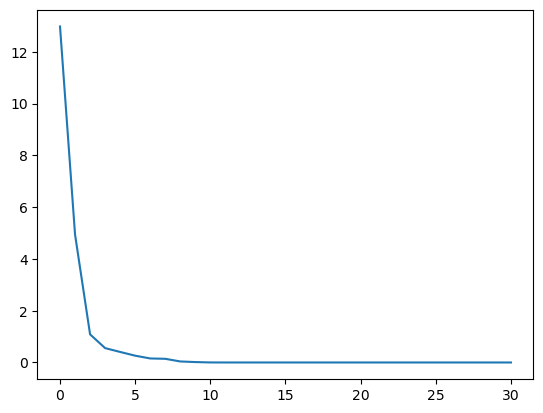

In [54]:
plt.plot(svd.S.detach().cpu().numpy())

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


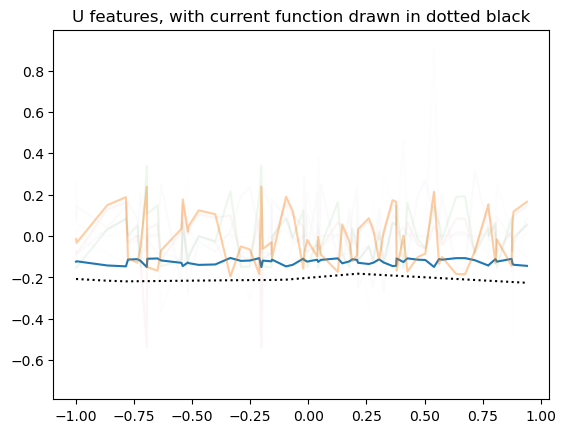

In [68]:
plot_1d_u_feats(x, ts.model)

In [69]:
ts.train(1)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


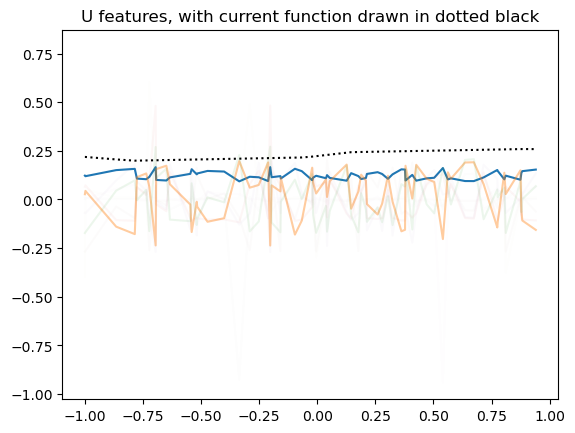

In [70]:

plot_1d_u_feats(x, ts.model)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


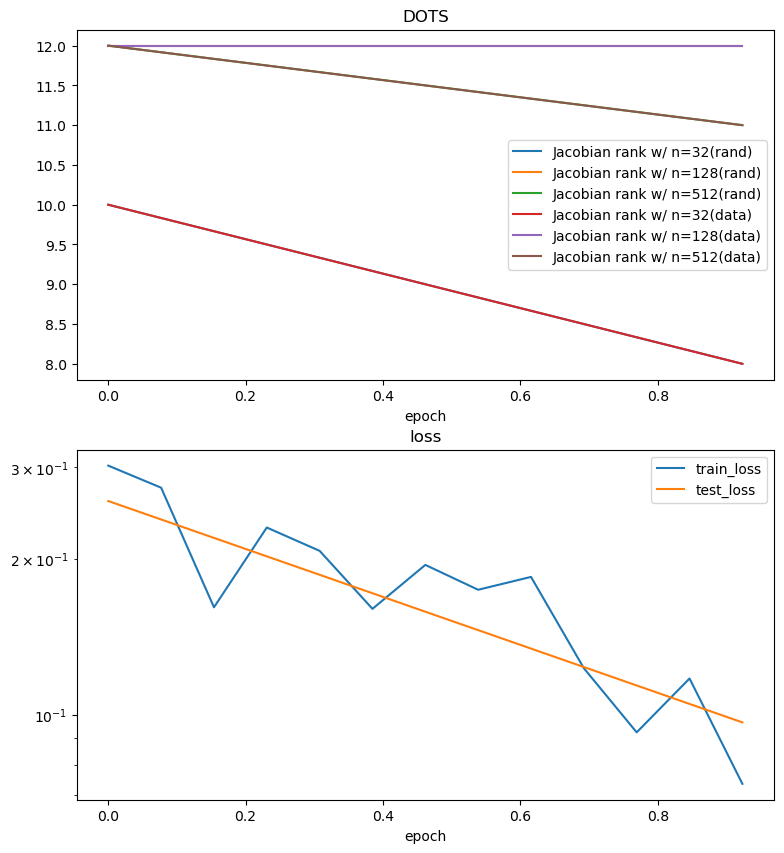

In [71]:
ts.plot()

In [73]:
ts.train(4)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


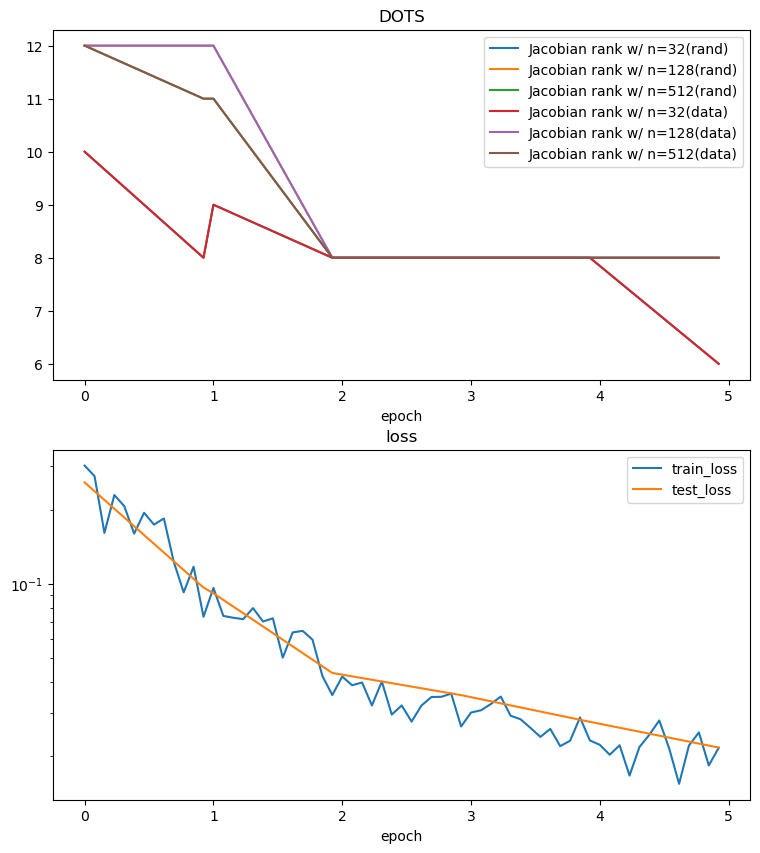

In [74]:
ts.plot()

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


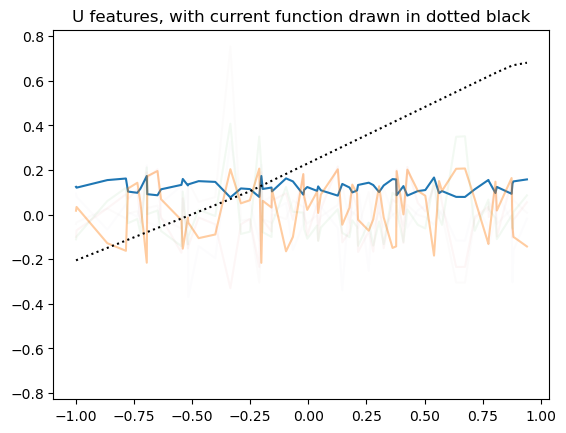

In [75]:

plot_1d_u_feats(x, ts.model)

In [76]:
ts.train(50)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


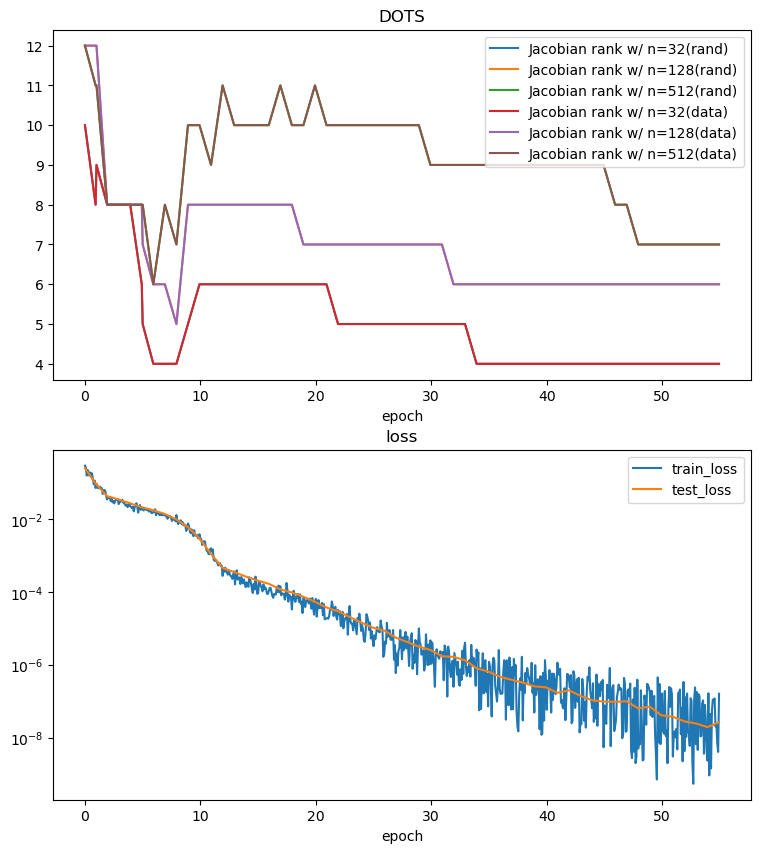

In [77]:
ts.plot()

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


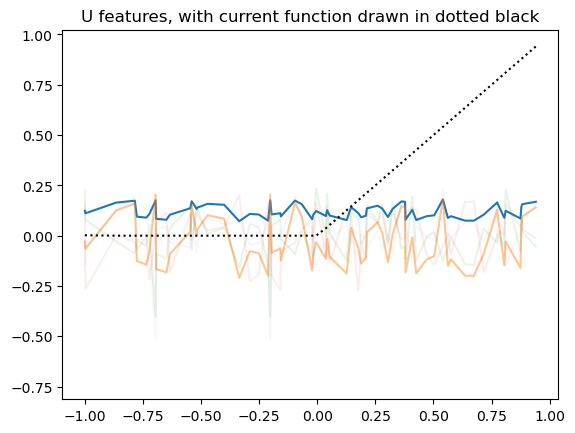

In [82]:
plot_1d_u_feats(x, ts.model)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


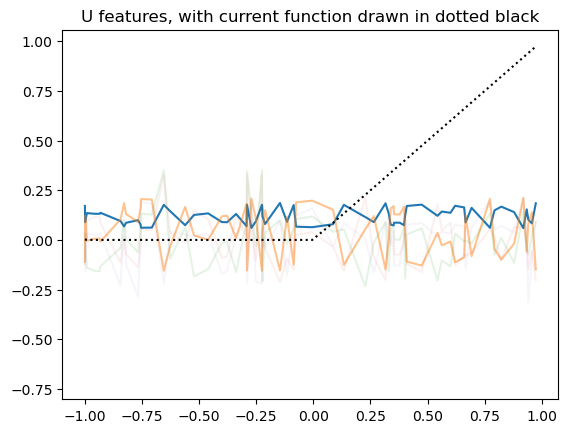

In [84]:
plot_1d_u_feats(next(iter(ts.dataloader))[0], ts.model)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


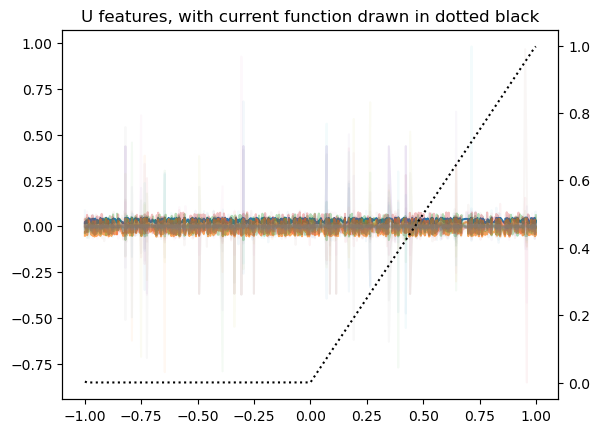

In [89]:
plot_1d_u_feats(range_batch(-1, 1, 1000), ts.model)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/utils.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


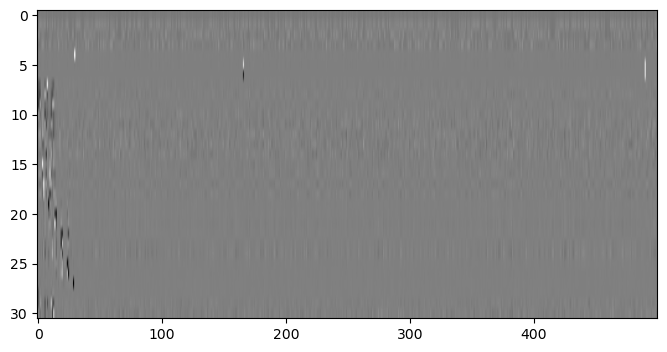

In [110]:
plot_u_feats_img(-1, 1, 500, ts.model)

# more graphs throughout relu training

In [130]:
cfg = "../experiments/mlp-relu-good.yml"
ds = tensor_of_dataset(get_config_dataset(cfg), range(512))
ts = get_train_state(cfg)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-pack

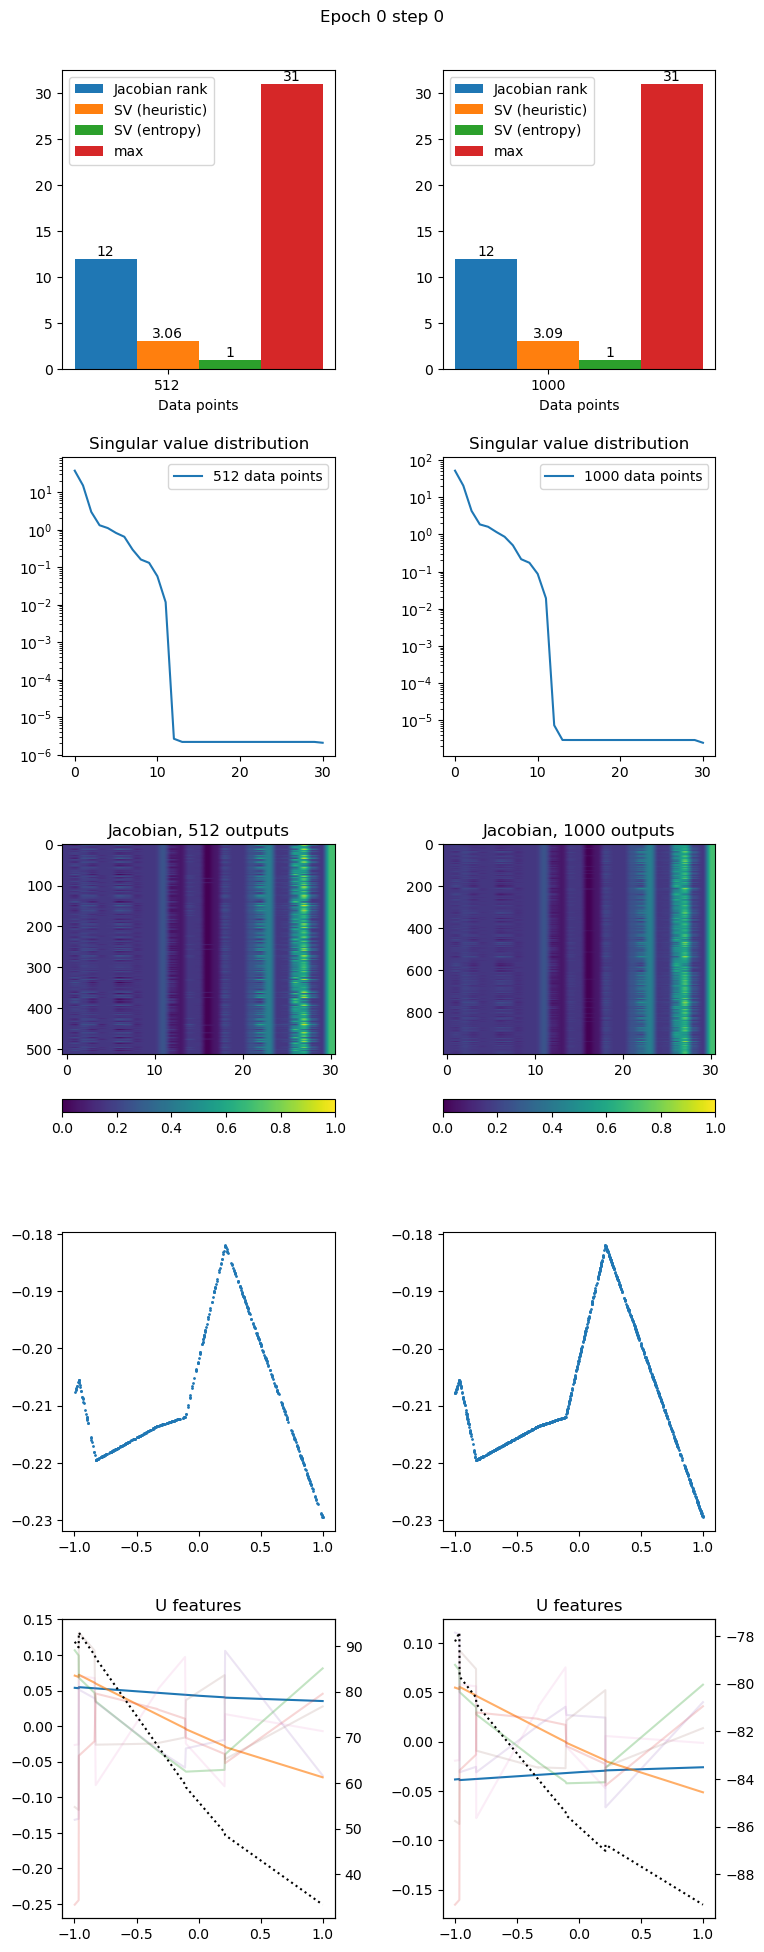

In [197]:
trainplot_1d(ts, x1=ds, x2=range_batch(-1, 1, 1000))

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if given_ax is None:


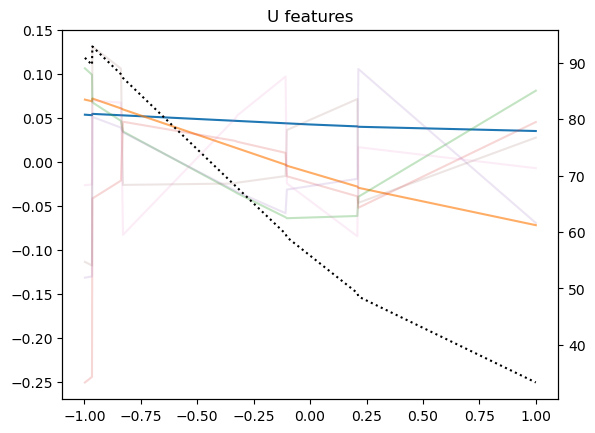

In [203]:
plot_1d_u_feats(ts.model, ds)

In [248]:
range_batch(-1, 1, 10, sort=True)

tensor([[-0.9808],
        [-0.9152],
        [-0.8944],
        [-0.8672],
        [-0.8414],
        [-0.6636],
        [-0.0997],
        [-0.0293],
        [ 0.1133],
        [ 0.3963]])

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if given_ax is None:
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:72: UserWarning: Matplotlib is currently

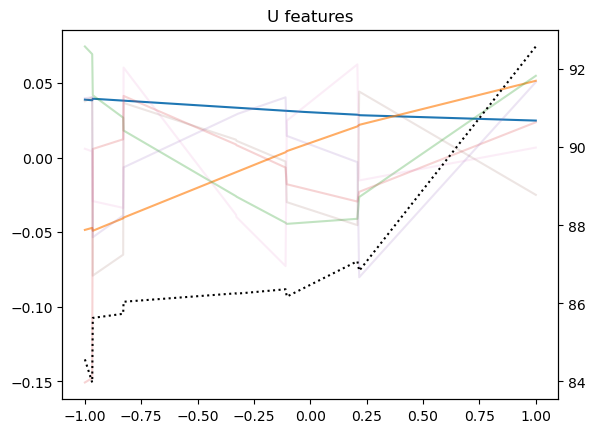

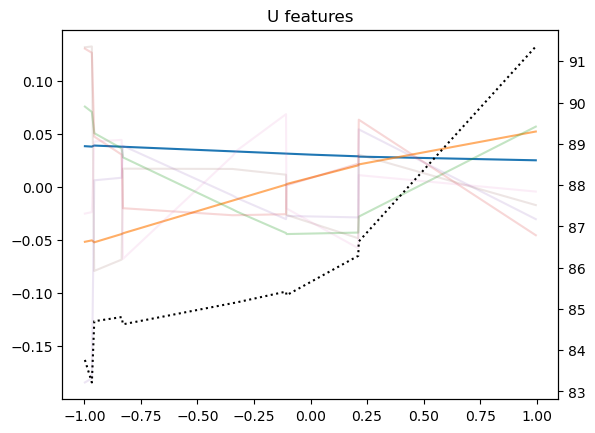

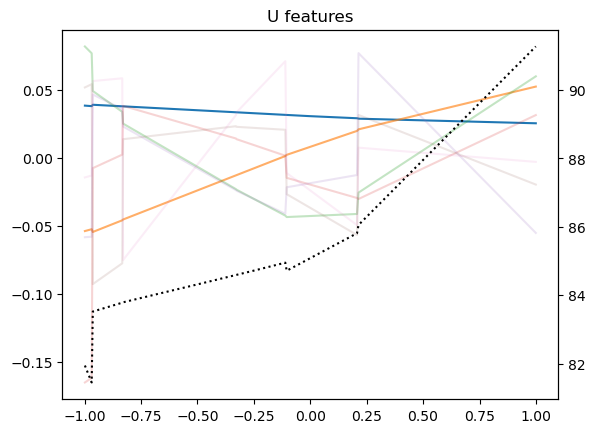

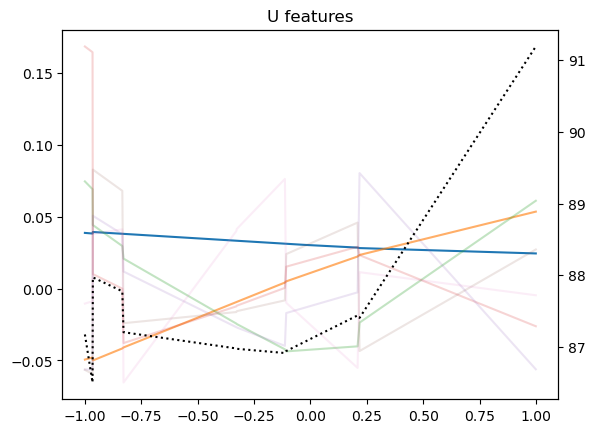

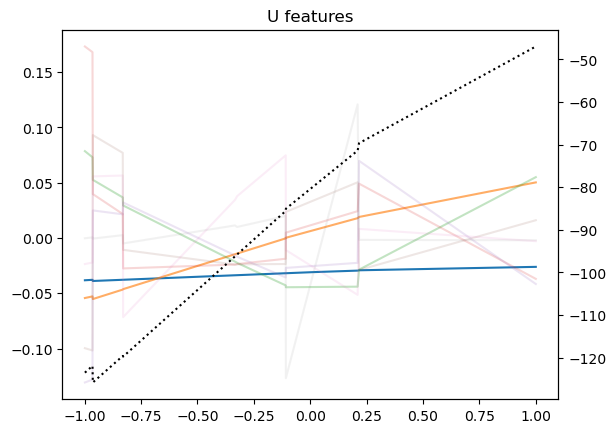

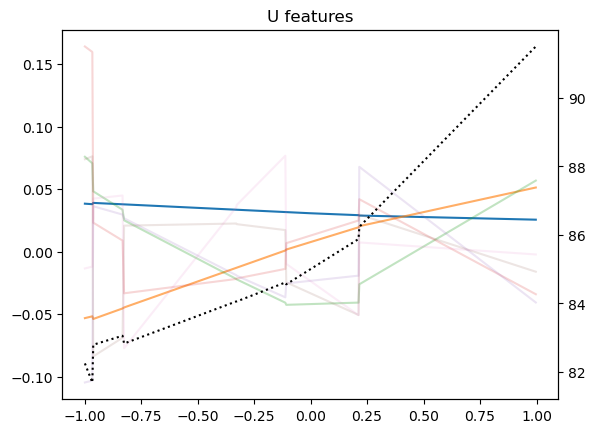

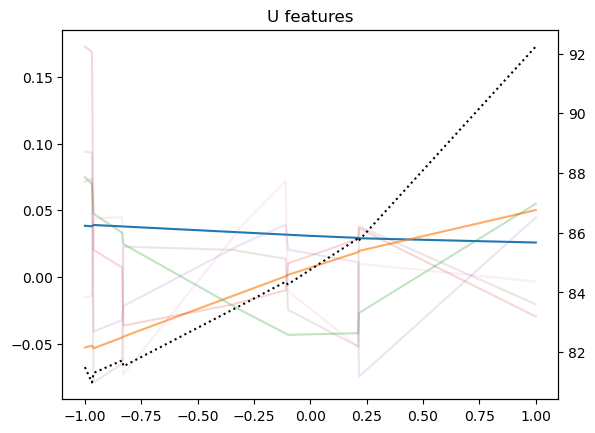

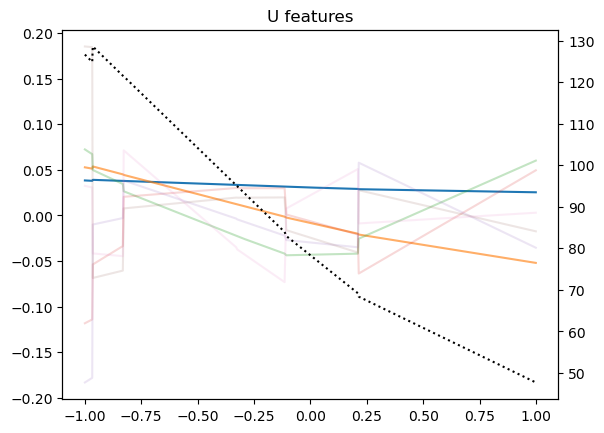

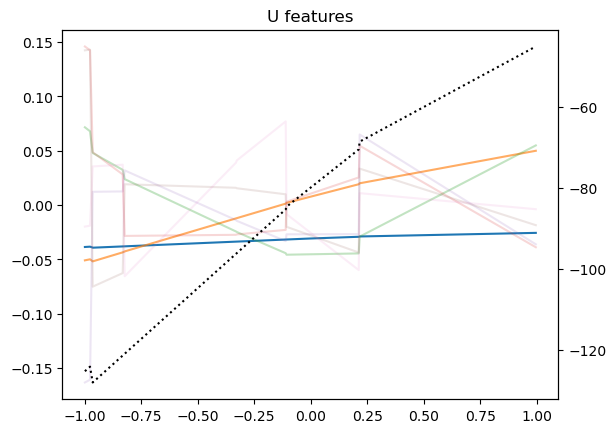

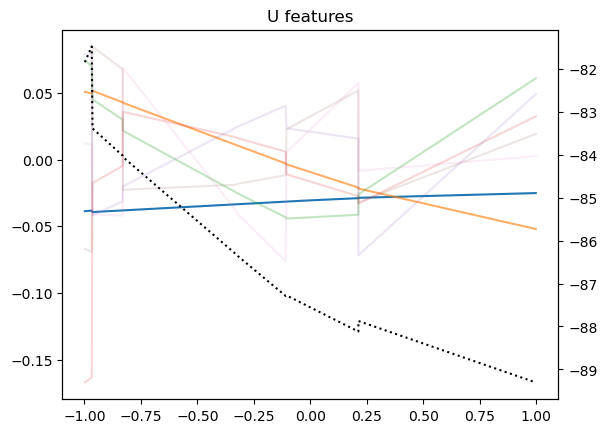

In [214]:
for _ in range(10):
    plot_1d_u_feats(ts.model, range_batch(-1, 1, 1000, sort=True))

In [188]:
average_U(
    t.tensor([
        [0, 1, 10],
        [1, 0, 1],
        [0, 1, 1],
        [1, 0, 1]
    ]),
    t.tensor([2, 1, 0.5])
)

tensor([[0.0000, 1.0000, 2.5000],
        [4.0000, 0.0000, 0.2500],
        [0.0000, 1.0000, 0.2500],
        [4.0000, 0.0000, 0.2500]])


tensor([3.5000, 4.2500, 1.2500, 4.2500])

In [240]:
t.linalg.svd(ts.model.matrix_jacobian(ds), full_matrices=False).U

tensor([[ 4.2812e-02, -1.1514e-02, -6.3251e-02,  ...,  0.0000e+00,
          0.0000e+00, -8.8353e-01],
        [ 3.8124e-02, -4.6851e-02,  9.9928e-03,  ..., -2.9135e-03,
         -5.7652e-03, -1.7110e-01],
        [ 5.2961e-02,  5.9359e-02,  3.3964e-02,  ..., -4.7047e-04,
         -5.4599e-03, -2.4033e-01],
        ...,
        [ 3.9362e-02, -3.5919e-02, -2.1030e-02,  ...,  7.7561e-03,
          4.4041e-03, -3.7926e-03],
        [ 4.6252e-02,  1.2433e-02, -4.0121e-02,  ...,  3.1735e-03,
         -3.8198e-02,  7.9351e-03],
        [ 3.7621e-02, -5.1283e-02,  2.2571e-02,  ...,  5.8443e-03,
          3.1981e-03,  7.1040e-04]])

In [230]:
x1 = range_batch(-1, 1, 9000, sort=True)
x2 = range_batch(-1, 1, 9000, sort=True)
(ts.model.u_features(x1) - ts.model.u_features(x2)).mean()

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


tensor(2.3911e-06)

In [245]:
ts.model.u_features(x1)

tensor([[ 1.2825e-02, -1.7448e-02,  2.5231e-02,  ...,  0.0000e+00,
          9.7595e-01,  5.8698e-02],
        [ 1.2824e-02, -1.7444e-02,  2.5215e-02,  ...,  8.1202e-03,
         -2.8721e-02,  1.4938e-01],
        [ 1.2824e-02, -1.7443e-02,  2.5214e-02,  ...,  2.3157e-04,
         -1.5390e-02,  3.3066e-01],
        ...,
        [ 8.4708e-03,  1.7294e-02,  1.9143e-02,  ...,  7.6760e-04,
          2.1606e-04,  2.6083e-03],
        [ 8.4707e-03,  1.7295e-02,  1.9145e-02,  ..., -4.3398e-04,
          4.9481e-04, -6.2308e-03],
        [ 8.4699e-03,  1.7302e-02,  1.9165e-02,  ...,  5.6734e-04,
         -3.3277e-05, -3.3538e-04]])

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


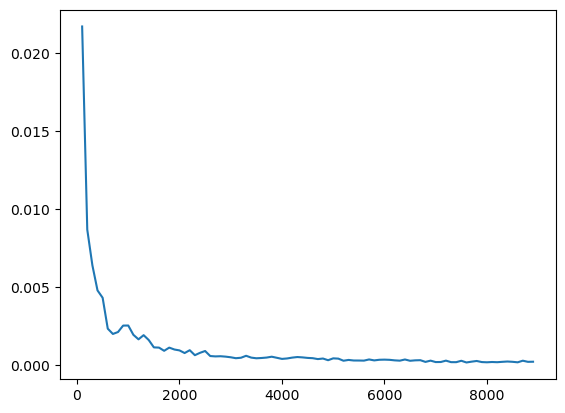

In [233]:
x = list(range(100, 9000, 100))
plt.plot(
    x,
    [
        ((
            ts.model.u_features(range_batch(-1, 1, n, sort=True)) - ts.model.u_features(range_batch(-1, 1, n, sort=True))
        )**2).mean().item()
        for n in x
    ],
    scaley="log"
)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


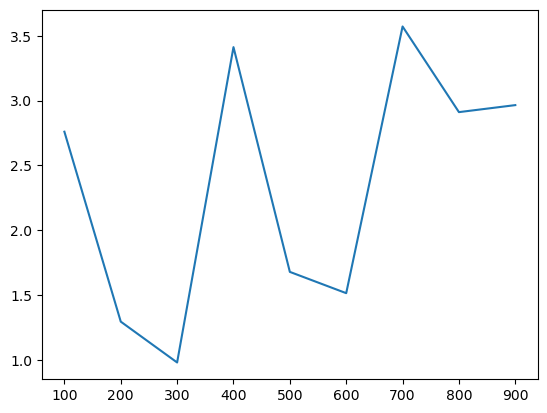

In [234]:
x = list(range(100, 1000, 100))
plt.plot(
    x,
    [
        ((
            ts.model.u_features(range_batch(-1, 1, n, sort=True)) - ts.model.u_features(range_batch(-1, 1, n, sort=True))
        )**2).max().item()
        for n in x
    ],
    scaley="log"
)